## Bitcoin Price Prediction 

### In this jupyter notebook we try to determine/classify whether it's good to invest in Bitcoin or not 

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
bit = pd.read_csv('bitcoin_price_data.csv')

In [3]:
bit.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
bit.shape

(2991, 10)

In [5]:
bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


## Data Cleaning

In [6]:
bit.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [7]:
bit.corr()

,SNo,High,Low,Open,Close,Volume,Marketcap
SNo,1.000000,0.667028,0.671538,0.668551,0.669008,0.718164,0.664713
High,0.667028,1.000000,0.998841,0.999442,0.999417,0.810464,0.999094
Low,0.671538,0.998841,1.000000,0.998905,0.999291,0.803110,0.999072
Open,0.668551,0.999442,0.998905,1.000000,0.998646,0.808439,0.998382
Close,0.669008,0.999417,0.999291,0.998646,1.000000,0.807388,0.999709
Volume,0.718164,0.810464,0.803110,0.808439,0.807388,1.000000,0.809156
Marketcap,0.664713,0.999094,0.999072,0.998382,0.999709,0.809156,1.000000


In [8]:
bit['Name'].nunique()

1

In [9]:
bit['Name'].value_counts()

Bitcoin    2991
Name: Name, dtype: int64

In [10]:
bit['Symbol'].nunique()

1

In [11]:
bit['Symbol'].value_counts()

BTC    2991
Name: Symbol, dtype: int64

In [12]:
bit['Date'].nunique()

2991

In [13]:
bit['Date'].value_counts()

2018-11-12 23:59:59    1
2013-07-31 23:59:59    1
2015-05-03 23:59:59    1
2021-03-30 23:59:59    1
2015-06-07 23:59:59    1
                      ..
2015-09-08 23:59:59    1
2017-01-07 23:59:59    1
2015-12-04 23:59:59    1
2018-05-07 23:59:59    1
2018-01-28 23:59:59    1
Name: Date, Length: 2991, dtype: int64

In [14]:
bit['Volume'].nunique()

2750

In [15]:
bit['Volume'].value_counts()

0.000000e+00    242
4.267040e+09      1
4.262370e+10      1
1.655277e+10      1
1.489880e+07      1
               ... 
1.791340e+07      1
2.366300e+08      1
1.642770e+07      1
2.577750e+07      1
6.538298e+10      1
Name: Volume, Length: 2750, dtype: int64

In [16]:
bit.duplicated().sum() # finding the total number of duplicate columns

0

In [17]:
bit.isnull().sum().sort_values(ascending=False) # sorting the "null" count values in the descending order

Marketcap    0
Volume       0
Close        0
Open         0
Low          0
High         0
Date         0
Symbol       0
Name         0
SNo          0
dtype: int64

In [18]:
bit.dtypes # checking the data types in-order to determine the categorical-value columns present in the dataset

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [19]:
bit.drop(['Name','Symbol','SNo'],axis=1,inplace=True)

In [20]:
bit.shape

(2991, 7)

In [21]:
bit.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [22]:
bit.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [23]:
df=pd.DataFrame(bit)

In [24]:
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [25]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [26]:
for d in df['Date']:
    datetime_obj = datetime.strptime(d, "%Y-%m-%d %H:%M:%S")
    df['Time']=datetime_obj.time()

In [27]:
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Time
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,23:59:59
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,23:59:59
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,23:59:59
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,23:59:59
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,23:59:59


In [28]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
Time          object
dtype: object

In [29]:
df['Time'].value_counts()

23:59:59    2991
Name: Time, dtype: int64

In [30]:
bit['Day'] = pd.to_datetime(df['Date']).dt.day

In [31]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [32]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [33]:
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Time,Day,Month,Year
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,23:59:59,29,4,2013
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,23:59:59,30,4,2013
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,23:59:59,1,5,2013
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,23:59:59,2,5,2013
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,23:59:59,3,5,2013


In [34]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
Time          object
Day            int64
Month          int64
Year           int64
dtype: object

In [35]:
df.drop(['Date','Time','Volume'], axis=1,inplace=True)

In [36]:
df.head()

,High,Low,Open,Close,Marketcap,Day,Month,Year
0,147.488007,134.000000,134.444000,144.539993,1.603769e+09,29,4,2013
1,146.929993,134.050003,144.000000,139.000000,1.542813e+09,30,4,2013
2,139.889999,107.720001,139.000000,116.989998,1.298955e+09,1,5,2013
3,125.599998,92.281898,116.379997,105.209999,1.168517e+09,2,5,2013
4,108.127998,79.099998,106.250000,97.750000,1.085995e+09,3,5,2013


## Data Visualisation 

In [37]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Marketcap    float64
Day            int64
Month          int64
Year           int64
dtype: object

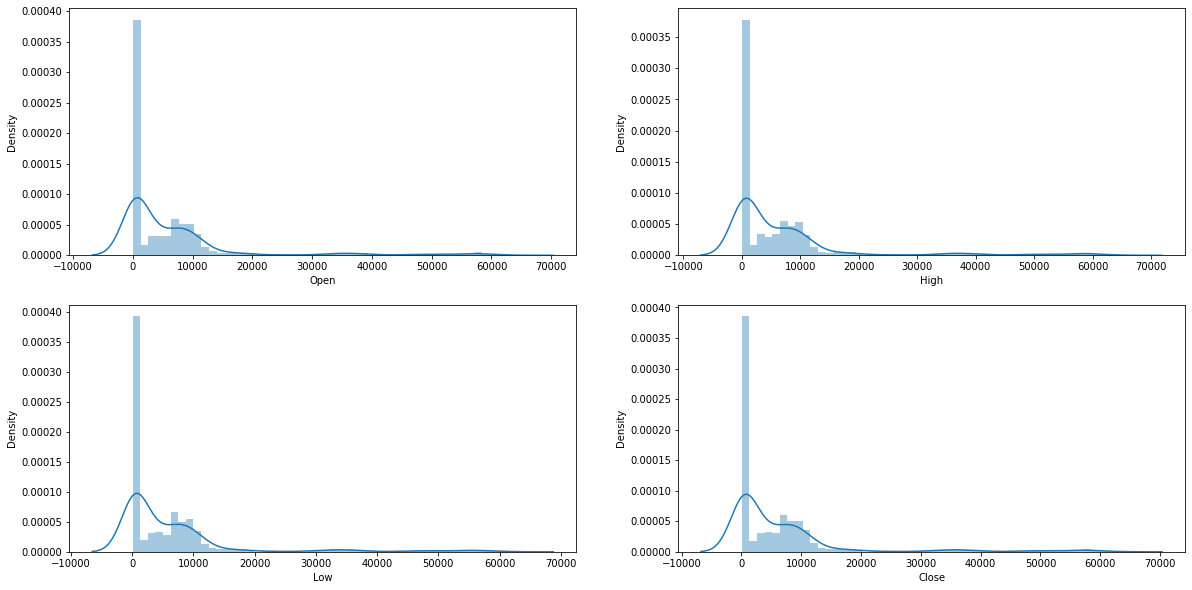

In [38]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])
plt.show()

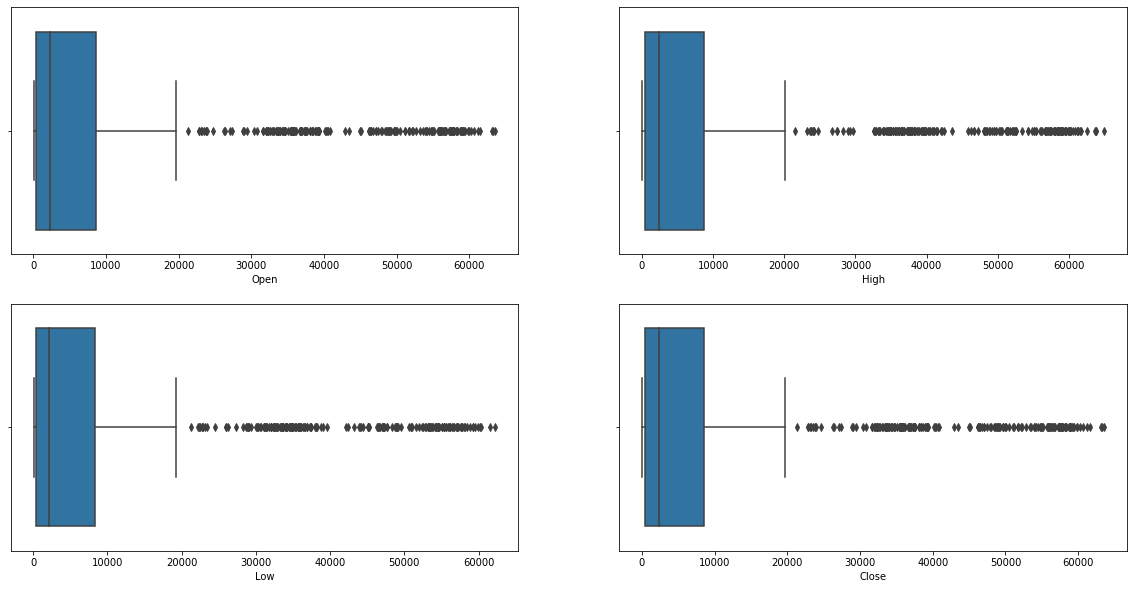

In [39]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
plt.show()

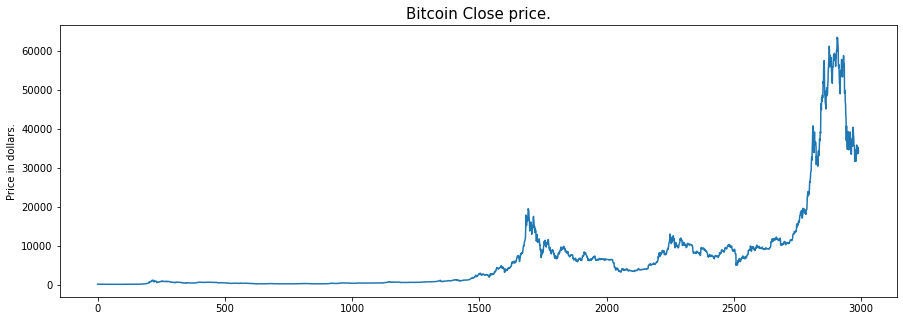

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

## Feature Engineering

In [41]:
df['Is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head(-10)

,High,Low,Open,Close,Marketcap,Day,Month,Year,Is_quarter_end
0,147.488007,134.000000,134.444000,144.539993,1.603769e+09,29,4,2013,0
1,146.929993,134.050003,144.000000,139.000000,1.542813e+09,30,4,2013,0
2,139.889999,107.720001,139.000000,116.989998,1.298955e+09,1,5,2013,0
3,125.599998,92.281898,116.379997,105.209999,1.168517e+09,2,5,2013,0
4,108.127998,79.099998,106.250000,97.750000,1.085995e+09,3,5,2013,0
...,...,...,...,...,...,...,...,...,...
2976,33292.454764,28893.621658,31622.377085,32505.659825,6.091806e+11,22,6,2021,1
2977,34753.408503,31772.632355,32515.714303,33723.028978,6.320113e+11,23,6,2021,1
2978,35228.852611,32385.214696,33682.800404,34662.435894,6.496440e+11,24,6,2021,1
2979,35487.248004,31350.883858,34659.104499,31637.780055,5.929782e+11,25,6,2021,1


In [42]:
df['Open-Close'] = df['Open'] - df['Close']
df['Low-High'] = df['Low'] - df['High']
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

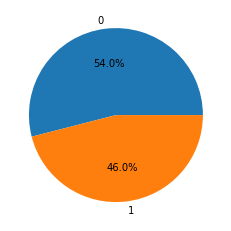

In [43]:
plt.pie(df['Target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [44]:
df.drop(['Day','Month','Year','Marketcap'],axis=1,inplace=True)

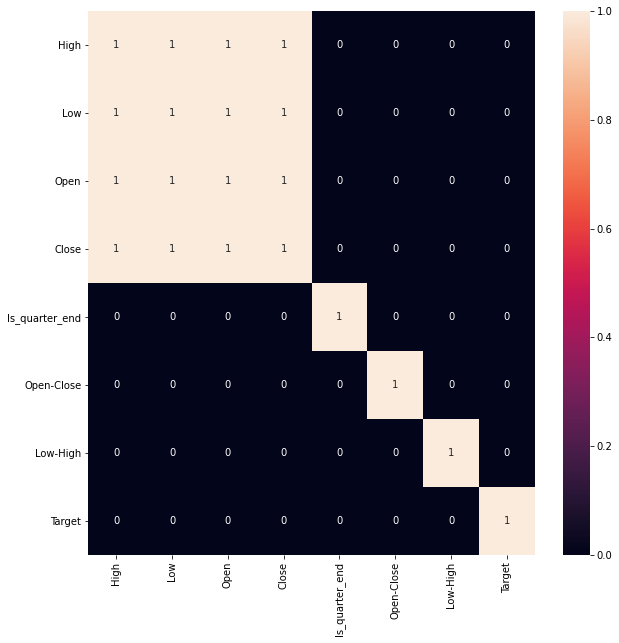

In [45]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr() > 0.9, annot=True)
plt.show()

In [46]:
X=df.drop(['High','Low','Open','Close','Target'],axis=1)
X.head()
# features = df[['Open-Close', 'Low-High', 'Is_quarter_end']]

,Is_quarter_end,Open-Close,Low-High
0,0,-10.095993,-13.488007
1,0,5.000000,-12.879990
2,0,22.010002,-32.169998
3,0,11.169998,-33.318100
4,0,8.500000,-29.028000


In [47]:
Y = df['Target']
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Target, dtype: int32

In [48]:
scaler = StandardScaler()
features = scaler.fit_transform(X)

## Data Splitting and Model Building

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)

(2691, 3) (300, 3)


In [50]:
Algorithm = []
Accuracy=[]

## Logistic Classification

In [51]:
from sklearn.linear_model import LogisticRegression
Algorithm.append('LogisticClassifier')
Classifier = LogisticRegression()
Classifier.fit(X_train, Y_train)
Accuracy.append( metrics.roc_auc_score(Y_train, Classifier.predict_proba(X_train)[:,1]))

In [52]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LogisticClassifier'],[0.5349497575363695],

## Support Vector Classification

In [53]:
from sklearn.svm import SVC
Algorithm.append('SupportVectorClassifier')
svcClassifier = SVC(kernel='poly', probability=True)
svcClassifier.fit(X_train, Y_train)
Accuracy.append( metrics.roc_auc_score(Y_train, svcClassifier.predict_proba(X_train)[:,1]))

In [54]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LogisticClassifier', 'SupportVectorClassifier'],[0.5349497575363695, 0.5004938148166664],

## XGBoost Classification

In [55]:
from xgboost import XGBClassifier
Algorithm.append('XGBClassifier')
xgbClassifier = XGBClassifier()
xgbClassifier.fit(X_train, Y_train)
Accuracy.append( metrics.roc_auc_score(Y_train, xgbClassifier.predict_proba(X_train)[:,1]))

[18:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LogisticClassifier', 'SupportVectorClassifier', 'XGBClassifier'],[0.5349497575363695, 0.5004938148166664, 0.9525473956684276],

In [57]:
acc = pd.DataFrame({'Algorithm': Algorithm,'Accuracy': Accuracy})
acc

,Algorithm,Accuracy
0,LogisticClassifier,0.534950
1,SupportVectorClassifier,0.500494
2,XGBClassifier,0.952547


In [64]:
pickle.dump(xgbClassifier, open('bitcoin_classifier.pkl', 'wb'))